<a href="https://colab.research.google.com/github/javiniki-mahesh/Machine-Learning/blob/main/SVC(classification%20of%20iris%20data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import  SVC
from sklearn.metrics import accuracy_score

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

#### Creating Data Frame

In [105]:
iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [106]:
iris_target = pd.DataFrame(data = iris.target, columns = ['target'])
iris_target

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [107]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [108]:
iris_df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


#### data distribution

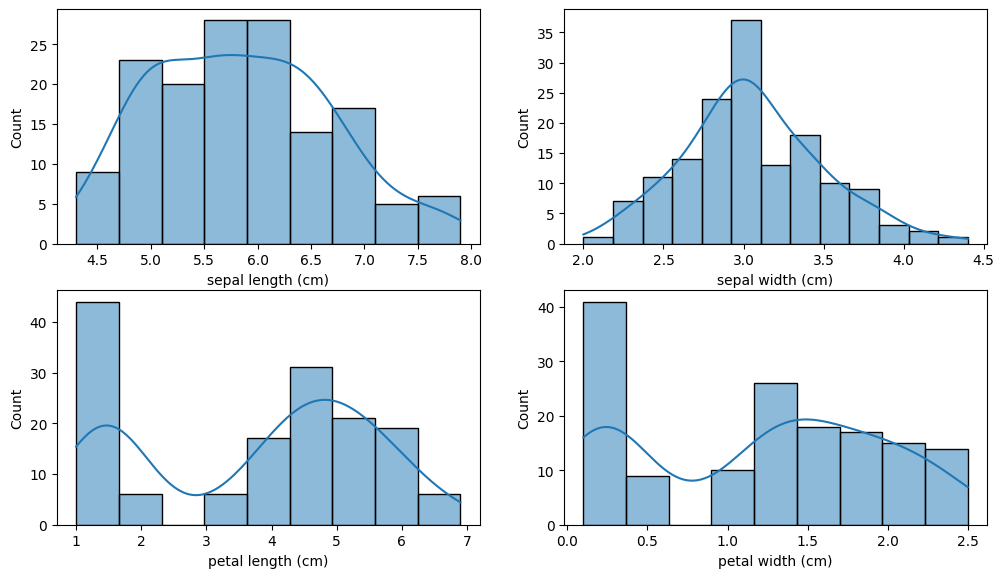

In [109]:
plt.figure('figsize', (12,14))
count = 1
for col in iris_df.columns:
  if count <=4 :
    plt.subplot(len(iris_df.columns), 2, count)
    sns.histplot(x = iris_df[col], kde = True)
  count+=1

#### Boxplot

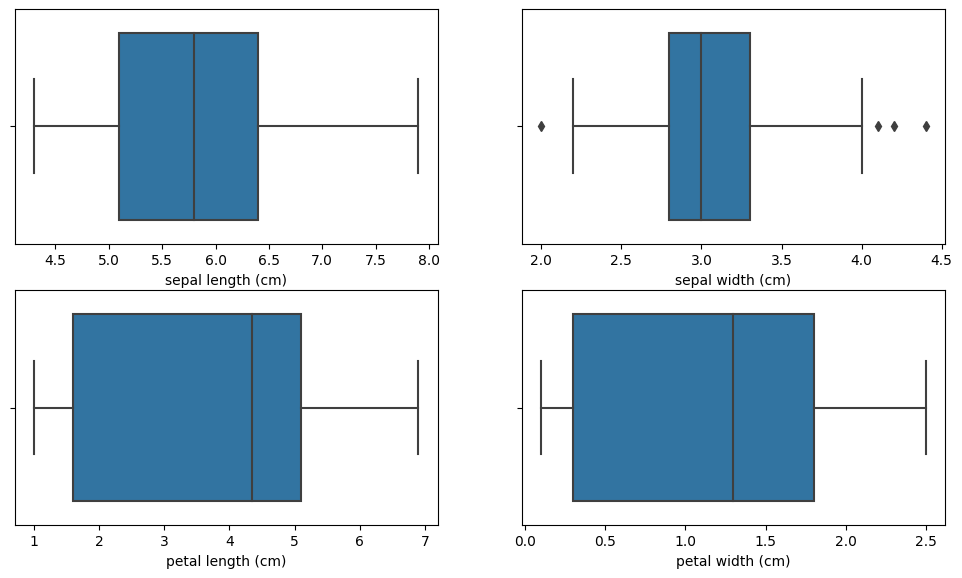

In [110]:
plt.figure('figsize', (12,14))
count = 1
for col in iris_df.columns:
  if count <=4 :
    plt.subplot(len(iris_df.columns), 2, count)
    sns.boxplot(x = iris_df[col])
  count+=1

<Axes: xlabel='target', ylabel='Count'>

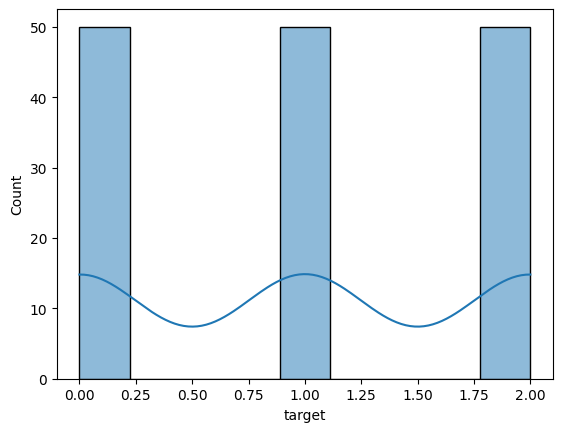

In [111]:
 sns.histplot(x = iris_target['target'], kde = True)

##### Splitting data for training and testing

In [112]:
xtrain, xtest, ytrain, ytest = train_test_split(iris_df, iris_target['target'], test_size = 0.2, random_state = 42)

In [113]:
xtrain.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2


In [114]:
xtest.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4


In [115]:
ytrain.head()

22    0
15    0
65    1
11    0
42    0
Name: target, dtype: int64

In [116]:
ytest.head()

73     1
18     0
118    2
78     1
76     1
Name: target, dtype: int64

In [117]:
svc = SVC()
model = svc.fit(xtrain, ytrain)
model

SVC()

In [118]:
ypred = model.predict(xtest)
ypred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [119]:
print(ytest)

73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
110    2
12     0
36     0
9      0
19     0
56     1
104    2
69     1
55     1
132    2
29     0
127    2
26     0
128    2
131    2
145    2
108    2
143    2
45     0
30     0
Name: target, dtype: int64


In [120]:
accuracy_score(ytest,ypred)

1.0

In [121]:
from sklearn.metrics import confusion_matrix

In [122]:
confusion_matrix(ytest, ypred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [123]:
lr = LogisticRegression(max_iter = 1000)
lr_model = lr.fit(xtrain, ytrain)
lr_model

LogisticRegression(max_iter=1000)

In [124]:
lr_ypred = lr_model.predict(xtest)
lr_ypred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [125]:
confusion_matrix(ytest, lr_ypred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [126]:
accuracy_score(ytest,lr_ypred)

1.0

#### Trying with different kernels

kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} default rbf

##### Linear kernel

In [127]:
svc_li = SVC(kernel = 'linear')
model_svc_li = svc_li.fit(xtrain, ytrain)
model_svc_li

SVC(kernel='linear')

In [128]:
ypred_svc_li = model_svc_li.predict(xtest)
ypred_svc_li

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [129]:
confusion_matrix(ytest, ypred_svc_li)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [130]:
accuracy_score(ytest,ypred_svc_li)

1.0

##### poly kernel

In [131]:
svc_poly = SVC(kernel = 'poly')
model_svc_poly = svc_poly.fit(xtrain, ytrain)
model_svc_poly

SVC(kernel='poly')

In [132]:
ypred_svc_poly = model_svc_poly.predict(xtest)
ypred_svc_poly

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [133]:
confusion_matrix(ytest, ypred_svc_poly)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [134]:
accuracy_score(ytest,ypred_svc_poly)

1.0

Till now all the classification models which includes:


1.   Logistic Regression
2.   SVC kernel (linear, poly, rbf)

are effective able to classify the data 





##### sigmoid

In [135]:
svc_sigmoid = SVC(kernel = 'sigmoid')
model_svc_sigmoid = svc_sigmoid.fit(xtrain, ytrain)
model_svc_sigmoid

SVC(kernel='sigmoid')

In [136]:
ypred_svc_sigmoid = model_svc_sigmoid.predict(xtest)
ypred_svc_sigmoid

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [137]:
confusion_matrix(ytest, ypred_svc_sigmoid)

array([[ 0, 10,  0],
       [ 0,  9,  0],
       [ 0, 11,  0]])

In [138]:
accuracy_score(ytest,ypred_svc_sigmoid)

0.3

From the above absorvation we can not use sigmoid for this porblem becaluse sigmoid is applicable only for binary classification.